# Modelo Eda Vinos 

## Tabla de contenidos
    1. Carga librerías y base de datos
    2. Preparación de bases de datos

## 1. Carga librerías y base de datos

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


In [4]:
%pip install markupsafe==2.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


### 1.1 punto de montaje carpeta drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Preparación de bases de datos

### 2.1 Carga la fuente de datos

In [6]:
# se carga la fuente de datos
path = '/content/drive/MyDrive/Colab Notebooks/Training ML/Proyecto Calidad de Vino/winequality-red.csv'
data = pd.read_csv(path, delimiter=',', encoding='utf-8')

In [7]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Descripcion Columnas 
Variables de entrada (basadas en pruebas fisicoquímicas):


    1. acidez fija
    2. acidez volátil
    3. ácido cítrico
    4. azúcar residual
    5. cloruros
    6. anhídrido sulfuroso libre
    7. anhídrido sulfuroso total
    8. densidad
    9. pH
    10. sulfatos
    11. alcohol

Variable de salida (basada en datos sensoriales):

    12. calidad (puntuación entre 0 y 10)

Link :  https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009


In [9]:
# validamos estratura de la matrix de datos 
data.shape

(1599, 12)

In [10]:
# lista nombres de Columnas.
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
# validamos la variable repuesta
from pandas.core.algorithms import quantile
data["quality"].value_counts()
# el dataset se encutra desvalaciado, dado que las calificacions de la calidad de vino (3,8 y 4) presentan menos cantidad de datos.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

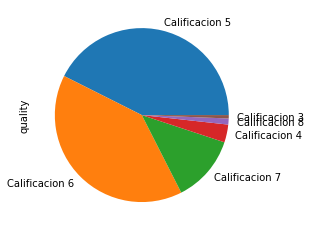

In [12]:
# visaulizamos  el % por clasificción
data["quality"].value_counts(True).rename({3: 'Calificacion 3', 4: 'Calificacion 4', 5: 'Calificacion 5', 6: 'Calificacion 6', 7: 'Calificacion 7', 8: 'Calificacion 8',}).plot.pie()

In [13]:
# imprimme  el %  por clasificción  
data.quality.value_counts(True).rename({3: 'Calificacion 3', 4: 'Calificacion 4', 5: 'Calificacion 5', 6: 'Calificacion 6', 7: 'Calificacion 7', 8: 'Calificacion 8'})

Calificacion 5    0.425891
Calificacion 6    0.398999
Calificacion 7    0.124453
Calificacion 4    0.033146
Calificacion 8    0.011257
Calificacion 3    0.006254
Name: quality, dtype: float64

In [14]:
data['fixed acidity'].value_counts()

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64

In [15]:
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols     = data.select_dtypes(include=['category']).columns.to_list()
numeric_cols = data.select_dtypes(include=['float64', 'int']).columns.to_list()


In [16]:
numeric_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [17]:
df = pd.DataFrame(data)

In [18]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
%pip uninstall markupsafe

Found existing installation: MarkupSafe 2.1.1
Uninstalling MarkupSafe-2.1.1:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/MarkupSafe-2.1.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/markupsafe/*
Proceed (Y/n)? Y
  Successfully uninstalled MarkupSafe-2.1.1


In [5]:
%pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (30 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [3]:
from pandas_profiling import ProfileReport
from markupsafe import soft_unicode
profile = ProfileReport(df)
profile

ImportError: ignored

### funciones de pandas


In [12]:
# conteo
data.alcohol.count()

1599

In [13]:
# suma 
data.alcohol.sum()

16666.35

In [14]:
# maximo valor
data.alcohol.max()

14.9

In [15]:
# minimo valor 
data.alcohol.min()

8.4

In [16]:
# media 
data.alcohol.median()

10.2

In [17]:
# deviacion standar 
data.alcohol.std()

1.0656675818473946

### Valore  null 

In [18]:
data['fixed acidity'].fillna

<bound method Series.fillna of 0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64>

In [ ]:
# rellenar los valores nulos con el valor de  '0' o media a su caso 
data['fixed acidity'].fillna(value='Unknown',inplace=True)  # filling null values with unknown

In [ ]:
# Reemplazar los errores ortográficos y recoger las mismas categorías en el mismo nombre
data['fixed acidity'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

In [ ]:
# borrar columana 
data.drop(columns=['amount_tsh'],inplace=True )